In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kamrannaseer","key":"86bfee909777b6a9a32c48d76ca589d5"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

# Working

### Download Data

In [6]:
!kaggle datasets download -d lodetomasi1995/income-classification

  0% 0.00/459k [00:00<?, ?B/s]
100% 459k/459k [00:00<00:00, 68.3MB/s]


In [7]:
!mkdir lodetomasi1995

In [8]:
! unzip income-classification.zip -d lodetomasi1995

Archive:  income-classification.zip
  inflating: lodetomasi1995/income_evaluation.csv  


### Libraries

In [185]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import scipy
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Data Working

In [188]:
data = pd.read_csv("/content/lodetomasi1995/income_evaluation.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [172]:
# here we are getting only columns which have object type 
cate_df = data.select_dtypes(include=['object']).copy()
cate_df_sklearn = cate_df.copy()
lb_make = LabelEncoder()
cate_df_sklearn[' workclass'] = lb_make.fit_transform(cate_df[' workclass'])
cate_df_sklearn[' education'] = lb_make.fit_transform(cate_df[' education'])
cate_df_sklearn[' marital-status'] = lb_make.fit_transform(cate_df[' marital-status'])
cate_df_sklearn[' occupation'] = lb_make.fit_transform(cate_df[' occupation'])  
cate_df_sklearn[' relationship'] = lb_make.fit_transform(cate_df[' relationship'])
cate_df_sklearn[' race'] = lb_make.fit_transform(cate_df[' race'])
cate_df_sklearn[' sex'] = lb_make.fit_transform(cate_df[' sex'])
cate_df_sklearn[' native-country'] = lb_make.fit_transform(cate_df[' native-country'])
cate_df_sklearn[' income'] = lb_make.fit_transform(cate_df[' income'])
cate_df_sklearn.head() #Results in appending a new column to df
# here we are getting only columns which have int64 type 
cate_df_int = data.select_dtypes(include=['int64']).copy()
cate_df_int.head()
# joing above two dataframes
data = cate_df_sklearn.join(cate_df_int)
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,7,9,4,1,1,4,1,39,0,39,77516,13,2174,0,40
1,6,9,2,4,0,4,1,39,0,50,83311,13,0,0,13
2,4,11,0,6,1,4,1,39,0,38,215646,9,0,0,40
3,4,1,2,6,0,2,1,39,0,53,234721,7,0,0,40
4,4,9,2,10,5,2,0,5,0,28,338409,13,0,0,40


In [174]:
# min-max normalization
data=(data-data.min())/(data.max()-data.min())

In [104]:
# mean normalization
#data=(data-data.mean())/data.std()       # it didnt work well with this data 

In [119]:
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.875,0.600000,0.666667,0.071429,0.2,1.0,1.0,0.951220,0.0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.750,0.600000,0.333333,0.285714,0.0,1.0,1.0,0.951220,0.0,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.500,0.733333,0.000000,0.428571,0.2,1.0,1.0,0.951220,0.0,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.500,0.066667,0.333333,0.428571,0.0,0.5,1.0,0.951220,0.0,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.500,0.600000,0.333333,0.714286,1.0,0.5,0.0,0.121951,0.0,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [ ]:


#added some parameters
kf = KFold(n_splits = 5, shuffle = True, random_state = 2)
result = next(kf.split(df), None)
print (result)
(array([0, 2, 3, 5, 6, 7, 8, 9]), array([1, 4]))

train = df.iloc[result[0]]
test =  df.iloc[result[1]]

### Modeling

In [178]:
y = data[" income"]
X = data.drop([" income"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25) # 0.25 x 0.8 = 0.2

In [179]:
# model definition
model = Sequential()
# model body
model.add(Dense(64, activation="relu", input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu" ))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu" ))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid" ))
# Compiling the model
model.compile(optimizer="rmsprop", loss = 'binary_crossentropy', metrics=['accuracy'])

In [180]:
# model training
history = model.fit(X_train, y_train, epochs=25, verbose=1, validation_data=(X_val, y_val))

Epoch 1/25
611/611 [==============================] - 2s 2ms/step - loss: 0.5236 - accuracy: 0.7614 - val_loss: 0.4111 - val_accuracy: 0.8219
Epoch 2/25
611/611 [==============================] - 1s 2ms/step - loss: 0.4357 - accuracy: 0.7992 - val_loss: 0.3778 - val_accuracy: 0.8279
Epoch 3/25
611/611 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8185 - val_loss: 0.3643 - val_accuracy: 0.8271
Epoch 4/25
611/611 [==============================] - 1s 2ms/step - loss: 0.3850 - accuracy: 0.8235 - val_loss: 0.3520 - val_accuracy: 0.8383
Epoch 5/25
611/611 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8319 - val_loss: 0.3490 - val_accuracy: 0.8381
Epoch 6/25
611/611 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8334 - val_loss: 0.3450 - val_accuracy: 0.8400
Epoch 7/25
611/611 [==============================] - 1s 2ms/step - loss: 0.3704 - accuracy: 0.8360 - val_loss: 0.3454 - val_accuracy: 0.8417
Epoch 

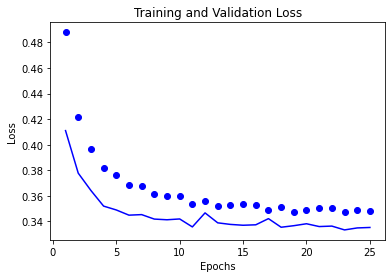

In [181]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label="Trainig Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

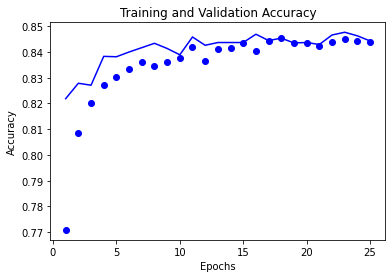

In [182]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Trainig Accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

### Predicting Test Dataset

In [183]:
# y_test.shape
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5, 1, 0)
y_pred = y_pred.reshape(6513)
# y_pred.shape

In [184]:

# Create the confusion matrix
# confmx = accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
# f, ax = plt.subplots(figsize = (8,8))
# sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show();

array([[4527,  400],
       [ 621,  965]])

# Data Insigths 

### Import libraries

In [190]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline


warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### Data

In [200]:
data = pd.read_csv("/content/lodetomasi1995/income_evaluation.csv")

### Exploratory data analysis

In [191]:
# View summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [192]:
# Check the data types of columns
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [193]:
# View statistical properties of dataset
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [195]:
# to view details of all columns irrespective of type
data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Useful commands to detect missing values

**df.isnull()**
The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.

**df.isnull().sum()**
The above command returns total number of missing values in each column in the dataframe.

**df.isnull().sum().sum()**
It returns total number of missing values in the dataframe.

**df.isnull().mean()**
It returns percentage of missing values in each column in the dataframe.

**df.isnull().any()**
It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

**df.isnull().any().any()**
It returns a boolean value indicating whether the dataframe has missing values or not. If dataframe contains missing values it returns TRUE and FALSE otherwise.

**df.isnull().values.any()**
It checks whether a particular column has missing values or not. If the column contains missing values, then it returns TRUE otherwise FALSE.

**df.isnull().values.sum()**
It returns the total number of missing values in the dataframe.

In [196]:
# check for missing values in all columns
data.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [197]:
# assert that there are no missing values in the dataframe
assert pd.notnull(data).all().all()

In [198]:
# Functional approach to Exploratory Data Analysis 
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

initial_eda(data)

Dimensions : 32561 rows, 15 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education-num      int64           16          0
                        marital-status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital-gain      int64          119          0
                          capital-loss      int64    

## Types of variables


1.   Categorical variables have data type object.
2.    Numerical variables have data type int64.



### Find categorical variables

In [199]:
# METHOD ONE
# here we are getting only columns which have object type 
cate_df = data.select_dtypes(include=['object']).copy()
cate_df_sklearn = cate_df.copy()
lb_make = LabelEncoder()
cate_df_sklearn[' workclass'] = lb_make.fit_transform(cate_df[' workclass'])
cate_df_sklearn[' education'] = lb_make.fit_transform(cate_df[' education'])
cate_df_sklearn[' marital-status'] = lb_make.fit_transform(cate_df[' marital-status'])
cate_df_sklearn[' occupation'] = lb_make.fit_transform(cate_df[' occupation'])  
cate_df_sklearn[' relationship'] = lb_make.fit_transform(cate_df[' relationship'])
cate_df_sklearn[' race'] = lb_make.fit_transform(cate_df[' race'])
cate_df_sklearn[' sex'] = lb_make.fit_transform(cate_df[' sex'])
cate_df_sklearn[' native-country'] = lb_make.fit_transform(cate_df[' native-country'])
cate_df_sklearn[' income'] = lb_make.fit_transform(cate_df[' income'])
cate_df_sklearn.head() #Results in appending a new column to df
# here we are getting only columns which have int64 type 
cate_df_int = data.select_dtypes(include=['int64']).copy()
cate_df_int.head()
# joing above two dataframes
data = cate_df_sklearn.join(cate_df_int)
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,7,9,4,1,1,4,1,39,0,39,77516,13,2174,0,40
1,6,9,2,4,0,4,1,39,0,50,83311,13,0,0,13
2,4,11,0,6,1,4,1,39,0,38,215646,9,0,0,40
3,4,1,2,6,0,2,1,39,0,53,234721,7,0,0,40
4,4,9,2,10,5,2,0,5,0,28,338409,13,0,0,40


In [203]:
# METHOD TWO
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 [' workclass', ' education', ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country', ' income']


In [204]:
data[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [206]:
# Frequency distribution of categorical variables
for var in categorical: 
    print(data[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-manager

In [207]:
# Percentage of frequency distribution of values
for var in categorical:
     print(data[var].value_counts()/np.float(len(data)))

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name:  workclass, dtype: float64
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name:  education, dtype: float64
 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Nam

**Explore the variables**

In [210]:
# check for missing values
data[' income'].isnull().sum()

0

In [211]:
# view number of unique values
data[' income'].nunique()

2

In [212]:
# view the unique values
data[' income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [213]:
# view the frequency distribution of values

data[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [214]:
# view percentage of frequency distribution of values
data[' income'].value_counts()/len(data)

 <=50K    0.75919
 >50K     0.24081
Name:  income, dtype: float64

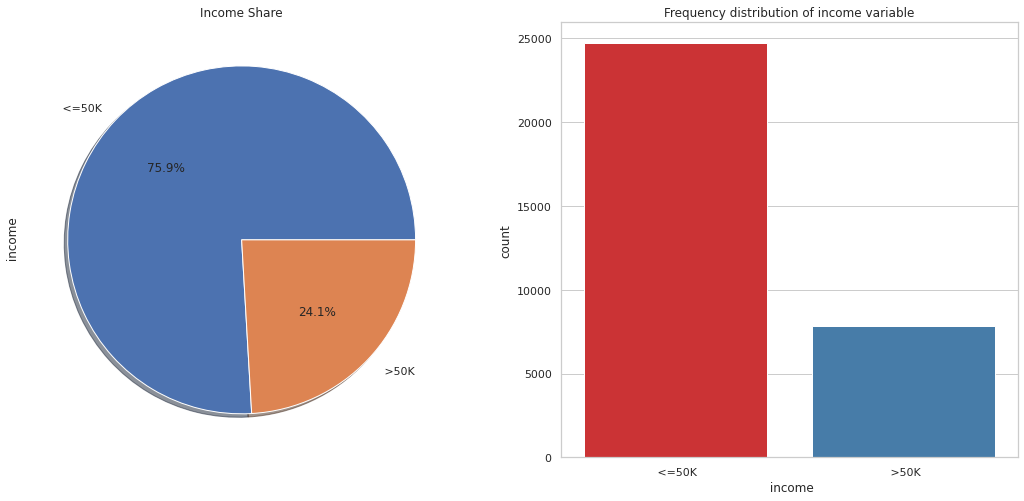

In [216]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = data[' income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x=" income", data=data, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

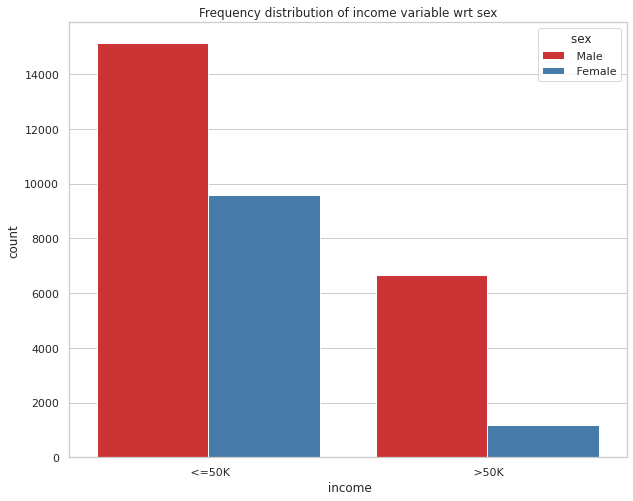

In [218]:
# Visualize income wrt sex variable
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x=" income", hue=" sex", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

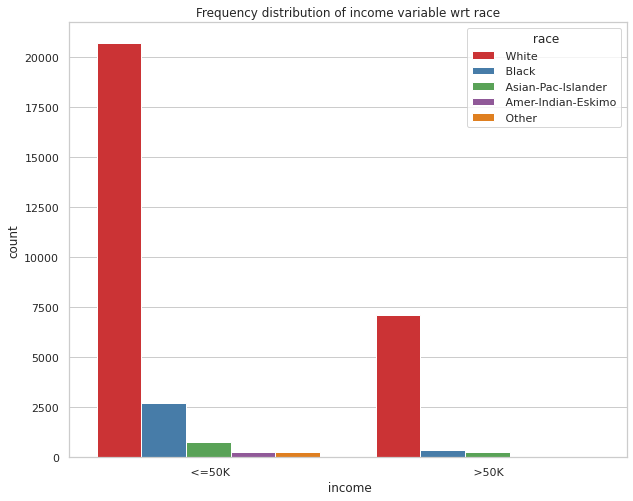

In [219]:
# Visualize income wrt race
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x=" income", hue=" race", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

**Explore workclass variable**

In [221]:
# check number of unique labels 
data[" workclass"].nunique()

9

In [222]:
# view the unique labels
data[" workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [223]:
# view frequency distribution of values
data[" workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [224]:
# replace '?' values in workclass variable with `NaN`
data[" workclass"].replace(' ?', np.NaN, inplace=True)

In [225]:
# again check the frequency distribution of values in workclass variable
data[" workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

**Visualize workclass variable**

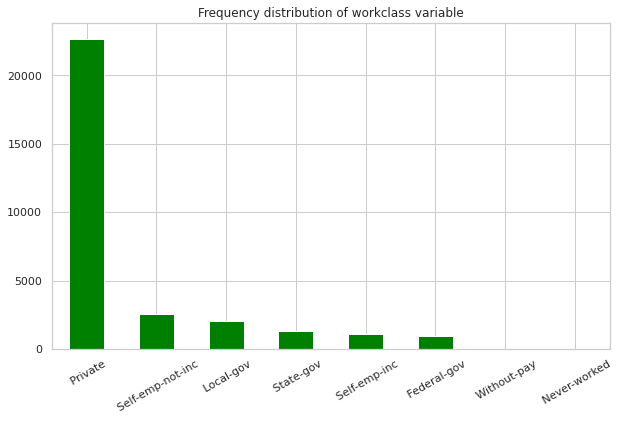

In [226]:
f, ax = plt.subplots(figsize=(10, 6))
ax = data[" workclass"].value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(data[" workclass"].value_counts().index, rotation=30)
plt.show()

**Visualize workclass variable wrt income variable**

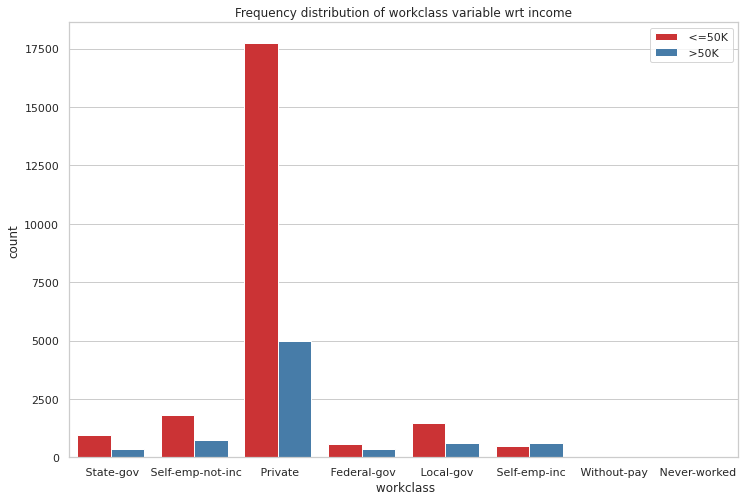

In [227]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x=" workclass", hue=" income", data=data, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

**Visualize workclass variable wrt sex variable**

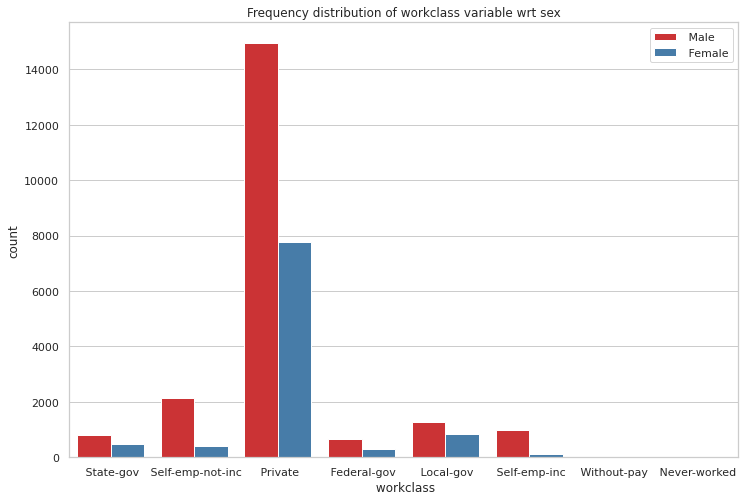

In [229]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x=" workclass", hue=" sex", data=data, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()

**Explore occupation variable**

In [230]:
# check number of unique labels
data[" occupation"].nunique()

15

In [231]:
# view unique labels
data[" occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [232]:
# view frequency distribution of values
data[" occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [233]:
# replace '?' values in occupation variable with `NaN`
data[' occupation'].replace(' ?', np.NaN, inplace=True)

In [234]:
# again check the frequency distribution of values
data[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

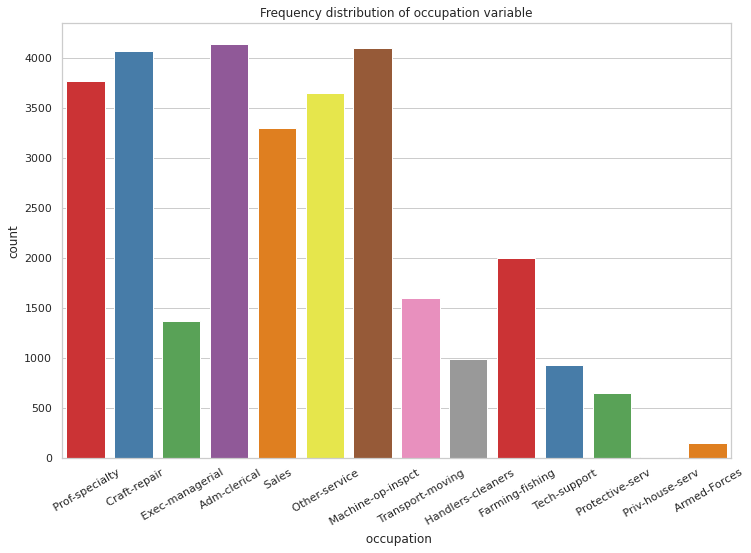

In [235]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x=" occupation", data=data, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(data[' occupation'].value_counts().index, rotation=30)
plt.show()

**Explore native_country variable**

In [238]:
# check number of unique labels
data[' native-country'].nunique()

42

In [239]:
# view unique labels 
data[' native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [240]:
# check frequency distribution of values
data[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [243]:
# replace '?' values in native_country variable with `NaN`
data[' native-country'].replace(' ?', np.NaN, inplace=True)

In [244]:
# again check the frequency distribution of values
data[' native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           29
 

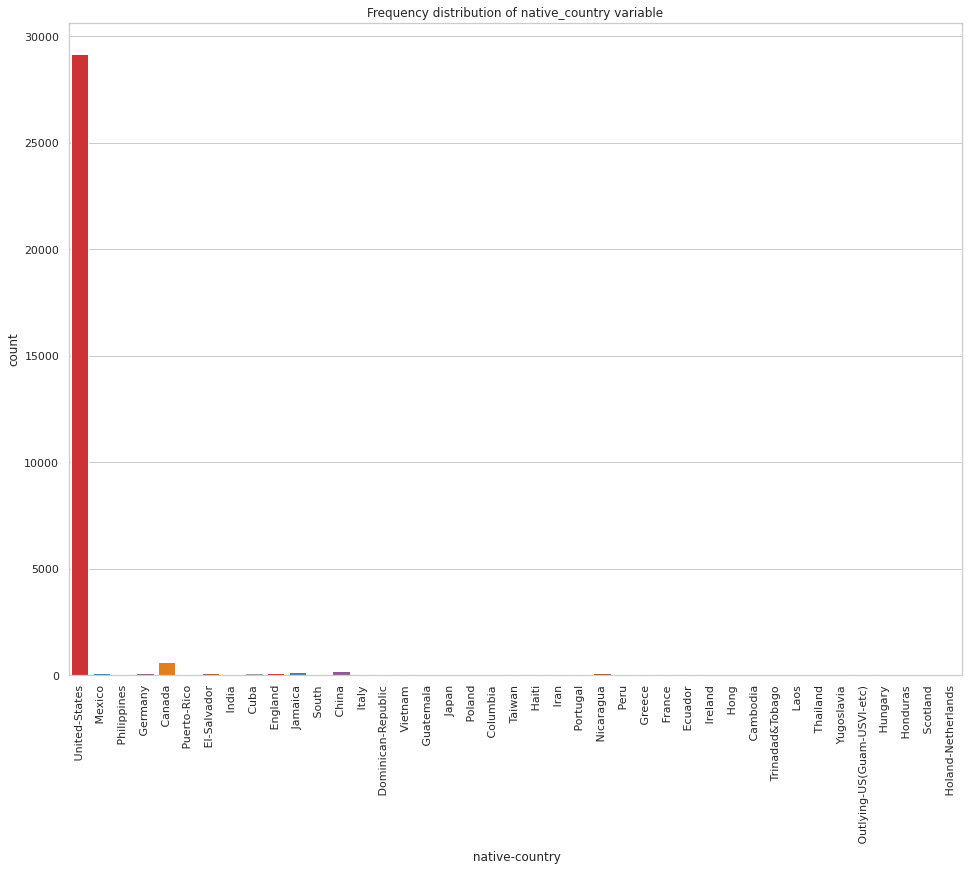

In [245]:
# visualize frequency distribution of `native_country` variable

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x=" native-country", data=data, palette="Set1")
ax.set_title("Frequency distribution of native_country variable")
ax.set_xticklabels(data[' native-country'].value_counts().index, rotation=90)
plt.show()

**Check missing values in categorical variables**

In [247]:
data[categorical].isnull().sum()

 workclass         1836
 education            0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 native-country     583
 income               0
dtype: int64

**Number of labels: Cardinality**

In [248]:
# check for cardinality in categorical variables

for var in categorical:
    print(var, ' contains ', len(data[var].unique()), ' labels')

 workclass  contains  9  labels
 education  contains  16  labels
 marital-status  contains  7  labels
 occupation  contains  15  labels
 relationship  contains  6  labels
 race  contains  5  labels
 sex  contains  2  labels
 native-country  contains  42  labels
 income  contains  2  labels


### Find numerical variables

In [249]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 6 numerical variables

The numerical variables are :

 ['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']


**Preview the numerical variables**

In [250]:
data[numerical].head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


**Check missing values in numerical variables**

In [251]:
data[numerical].isnull().sum()

age                0
 fnlwgt            0
 education-num     0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
dtype: int64

**Explore numerical variables**

**View the distribution of age variable**

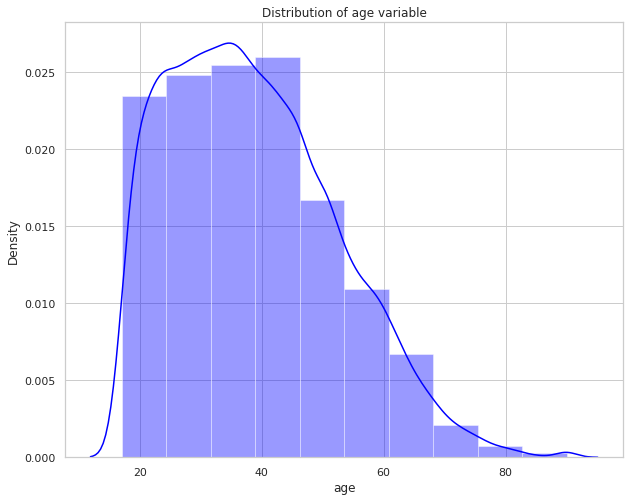

In [252]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

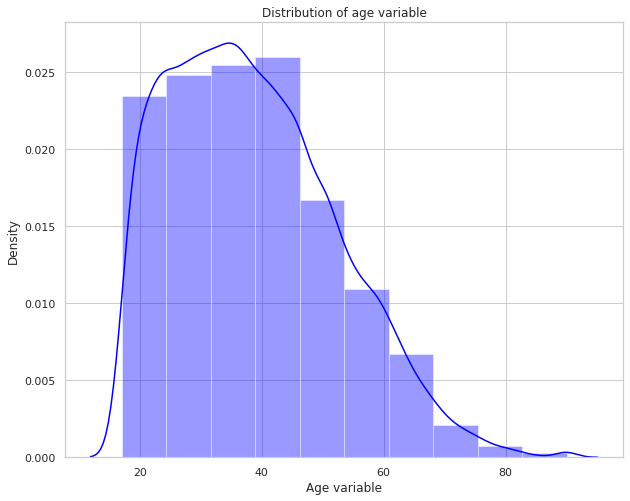

In [253]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
x = pd.Series(x, name="Age variable")
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

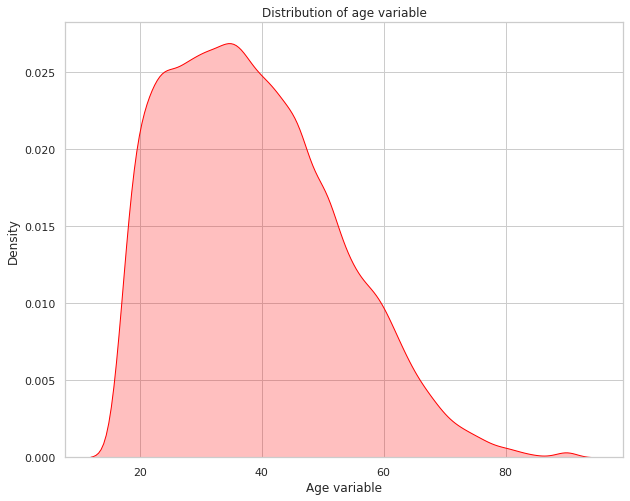

In [254]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

**Detect outliers in age variable with boxplot**

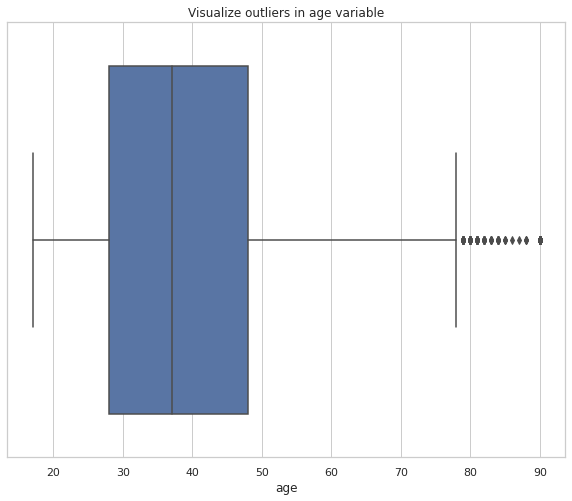

In [255]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

**Explore relationship between age and income variables**

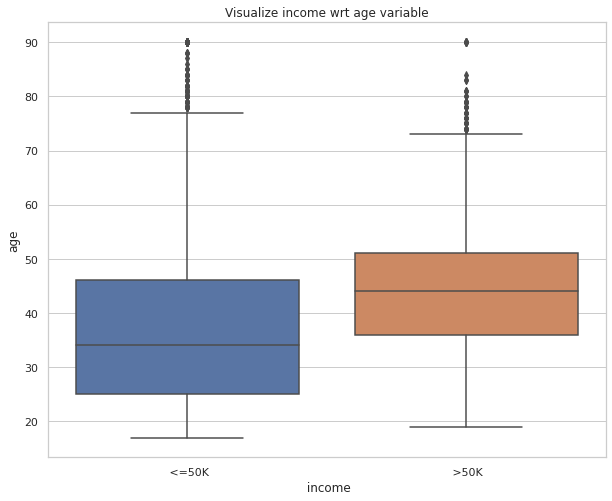

In [256]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x=" income", y="age", data=data)
ax.set_title("Visualize income wrt age variable")
plt.show()

**Visualize income wrt age and sex variable**

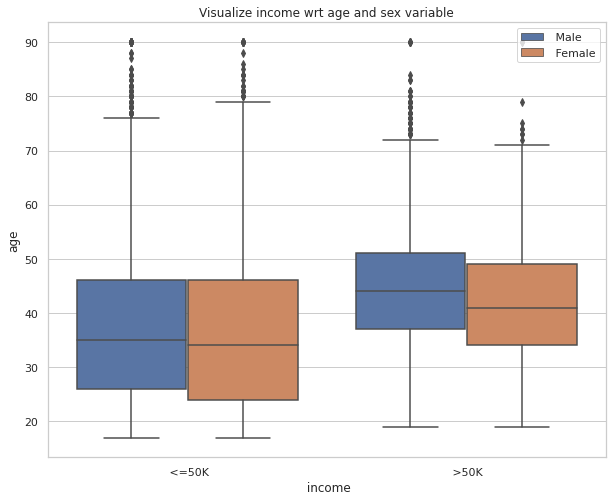

In [257]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x=" income", y="age", hue=" sex", data=data)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

<Figure size 576x432 with 0 Axes>

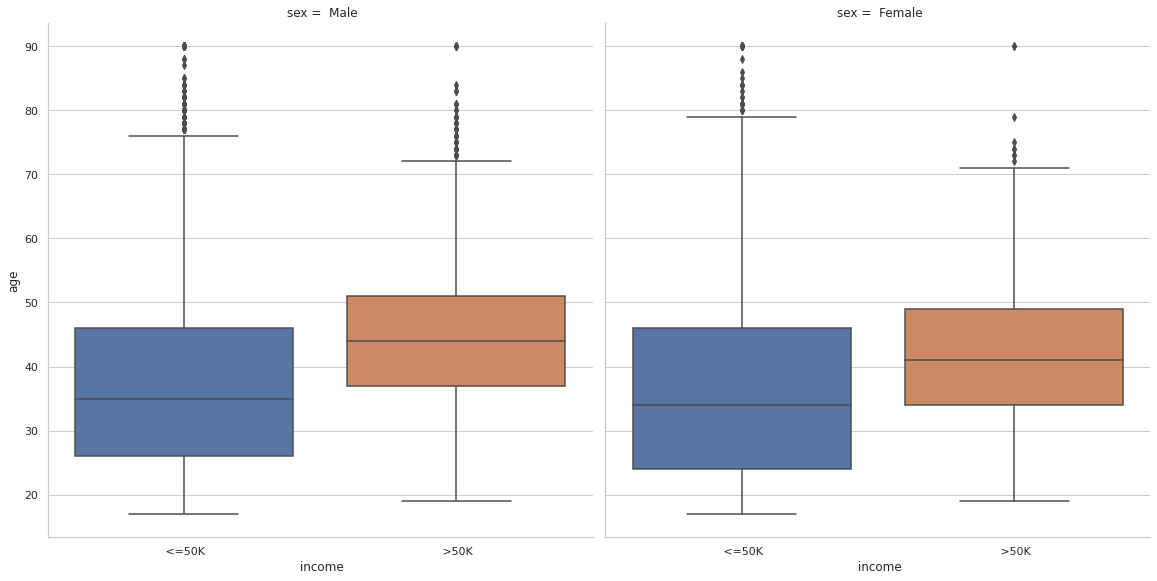

In [258]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x=" income", y="age", col=" sex", data=data, kind="box", height=8, aspect=1)
plt.show()

**Visualize relationship between race and age**

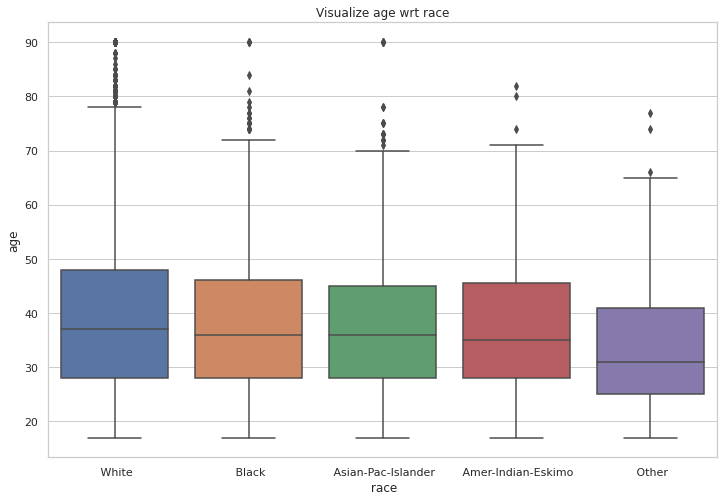

In [259]:
plt.figure(figsize=(12,8))
sns.boxplot(x =' race', y="age", data = data)
plt.title("Visualize age wrt race")
plt.show()

### ***Find out the correlations*** 

In [260]:
# plot correlation heatmap to find out correlations
data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education-num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital-gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital-loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours-per-week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


**Plot pairwise relationships in dataset**

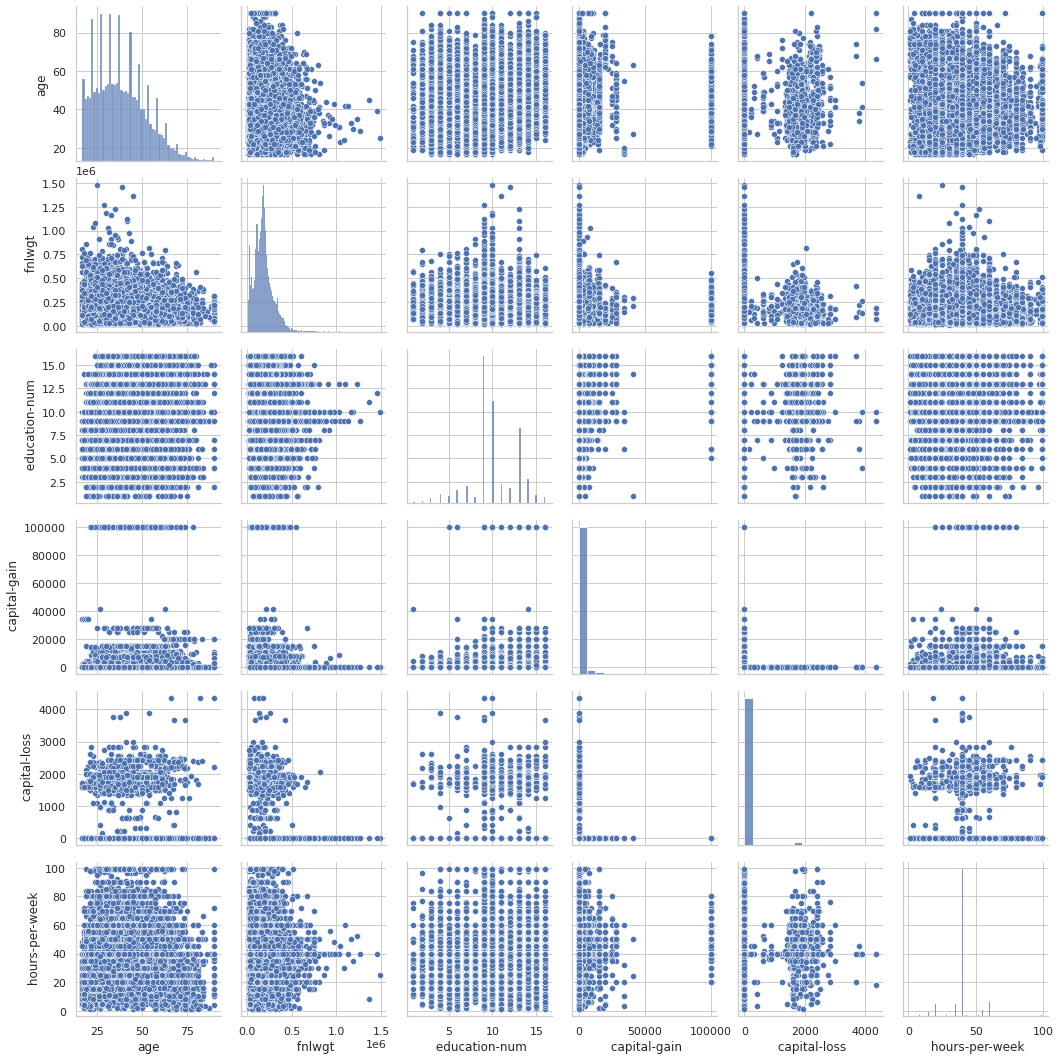

In [261]:
sns.pairplot(data)
plt.show()

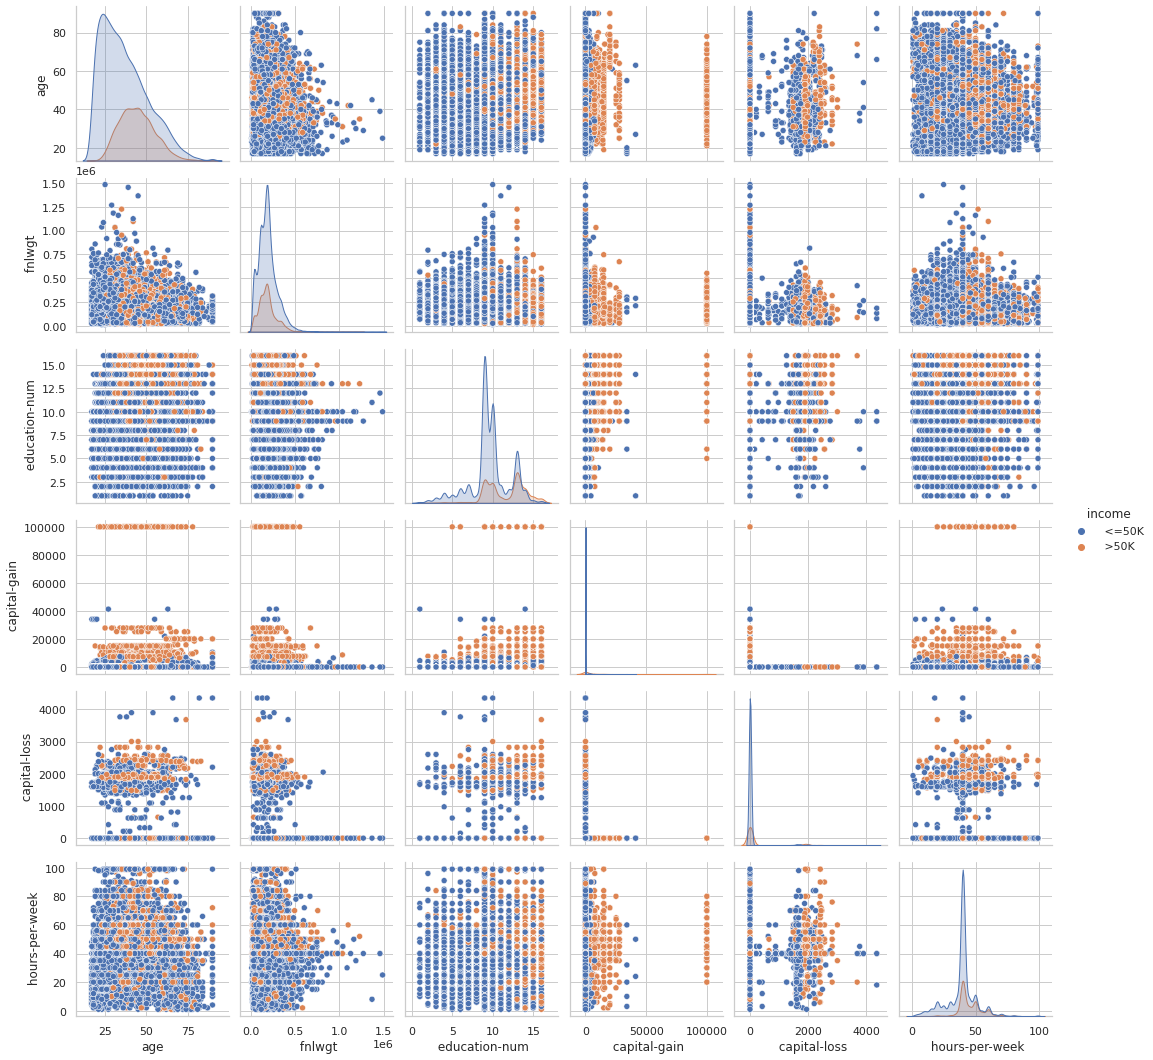

In [263]:
sns.pairplot(data, hue=" income")
plt.show()

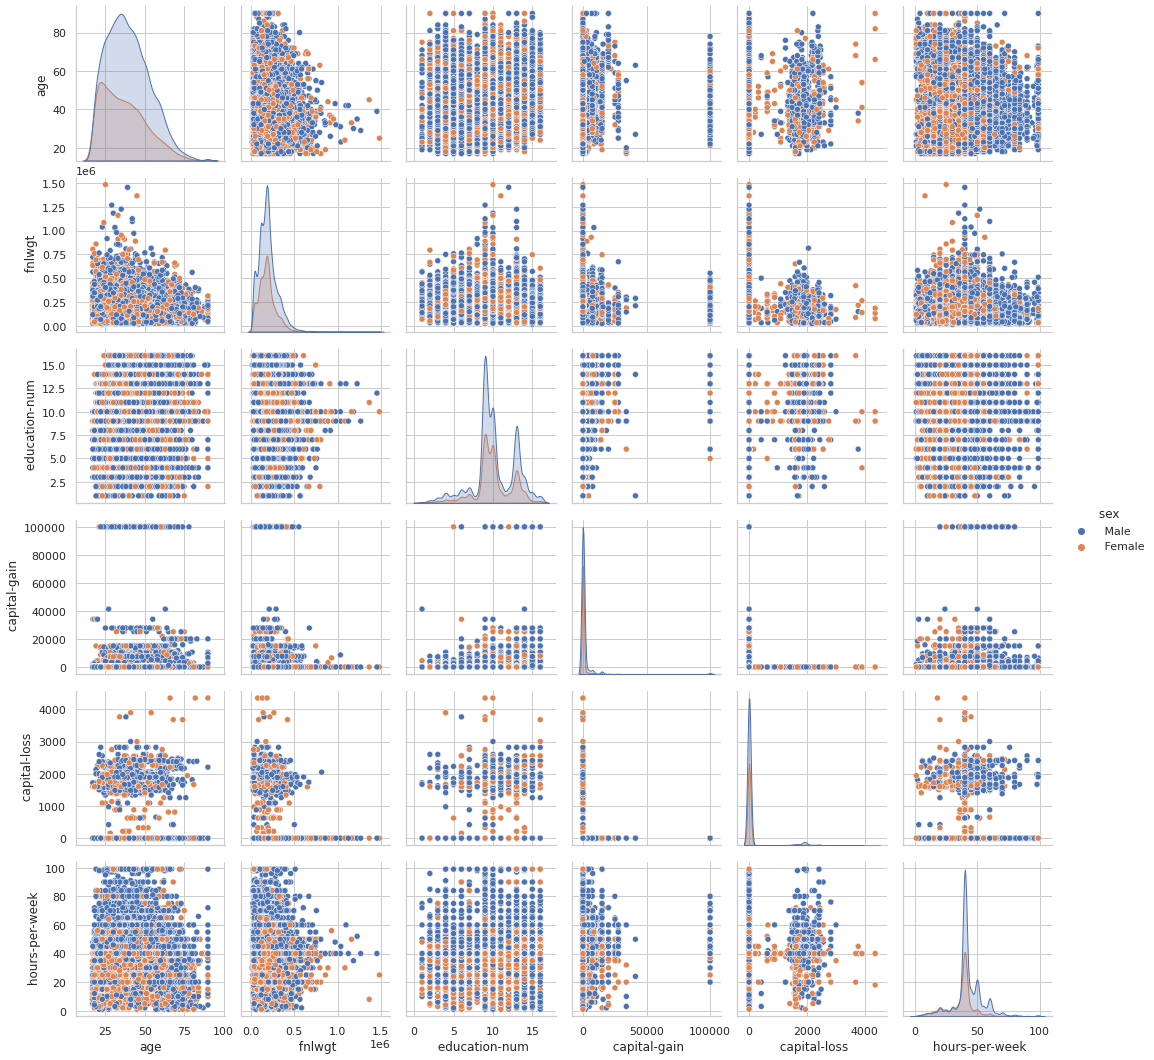

In [264]:
sns.pairplot(data, hue=" sex")
plt.show()

**Declare feature vector and target variable**

In [265]:
X = data.drop([' income'], axis=1)
y = data[' income']

**Split data into separate training and test set**

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [267]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

### ***Feature Engineering***  IMPORTANT

**Display categorical variables in training set**

In [268]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

[' workclass',
 ' education',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' native-country']

**Display numerical variables in training set**

In [269]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 ' fnlwgt',
 ' education-num',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week']

**Engineering missing values in categorical variables**

In [270]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

 workclass         0.055985
 education         0.000000
 marital-status    0.000000
 occupation        0.056072
 relationship      0.000000
 race              0.000000
 sex               0.000000
 native-country    0.018164
dtype: float64

In [271]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

 workclass 0.055984555984555984
 occupation 0.05607230607230607
 native-country 0.018164268164268166


In [273]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2[' workclass'].fillna(X_train[' workclass'].mode()[0], inplace=True)
    df2[' occupation'].fillna(X_train[' occupation'].mode()[0], inplace=True)
    df2[' native-country'].fillna(X_train[' native-country'].mode()[0], inplace=True)

In [274]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

 workclass         0
 education         0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 native-country    0
dtype: int64

In [275]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

 workclass         0
 education         0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 native-country    0
dtype: int64

In [276]:
# check missing values in X_train
X_train.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
dtype: int64

In [277]:
# check missing values in X_test
X_test.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
dtype: int64

**Encode categorical variables**

In [278]:
# preview categorical variables in X_train
X_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [280]:
# import category encoders
!pip install category_encoders
import category_encoders as ce

     |████████████████████████████████| 81kB 2.4MB/s 


In [281]:
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=[' workclass', ' education', ' marital-status', ' occupation', ' relationship', 
                                 ' race', ' sex', ' native-country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [282]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education-num,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,...,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
32098,45,1,0,0,0,0,0,0,0,170871,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [283]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,education_1,education_2,education_3,education_4,education_5,education_6,education_7,education_8,education_9,education_10,education_11,education_12,education_13,education_14,education_15,education_16,education-num,marital-status_1,marital-status_2,marital-status_3,marital-status_4,marital-status_5,marital-status_6,marital-status_7,occupation_1,occupation_2,occupation_3,occupation_4,occupation_5,occupation_6,...,native-country_2,native-country_3,native-country_4,native-country_5,native-country_6,native-country_7,native-country_8,native-country_9,native-country_10,native-country_11,native-country_12,native-country_13,native-country_14,native-country_15,native-country_16,native-country_17,native-country_18,native-country_19,native-country_20,native-country_21,native-country_22,native-country_23,native-country_24,native-country_25,native-country_26,native-country_27,native-country_28,native-country_29,native-country_30,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
22278,27,1,0,0,0,0,0,0,0,177119,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### **Feature Scaling**

In [284]:
cols = X_train.columns

In [285]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [286]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [288]:
X_train.shape

(22792, 105)

In [287]:
X_test = pd.DataFrame(X_test, columns=[cols])